라이브러리

In [1]:
import pandas as pd
import numpy as np
from keras.utils import *
from keras.models import load_model
from keras.metrics import mean_squared_error
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean, cosine
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [2]:
def grapeNEva(y_test, standard_model, lstm_model, minmax_model, robust_model, trend_model30, seasonal_model30, trend_model0, seasonal_model0, resid_model0, standard_scaler, minmax_scaler, robust_scaler, X_test_trend, X_test_seasonal, X_test_standard, X_test_lstm, X_test_minmax, X_test_robust):
    X_test_trend0 = X_test_trend.copy()
    X_test_trend0 = X_test_trend0[['do_mg', 'do_temp', 'ph', 'orp', 'co2_mg']]
    X_test_trend0 = np.asarray(X_test_trend0, dtype=np.float64)
    X_test_trend0 = X_test_trend0.reshape((-1, 6, 5))
    X_test_seasonal0 = X_test_trend.copy()
    X_test_seasonal0 = X_test_seasonal0[['feed_quantity', 'water_quantity']]
    X_test_seasonal0 = np.asarray(X_test_seasonal0, dtype=np.float64)
    X_test_seasonal0 = X_test_seasonal0.reshape((-1, 6, 2))
    X_test_resid0 = X_test_trend.copy()
    X_test_resid0 = X_test_resid0[['do_mg']]
    X_test_resid0 = np.asarray(X_test_resid0, dtype=np.float64)
    X_test_resid0 = X_test_resid0.reshape((-1, 6, 1))
    X_pred_trnad0 = trend_model0.predict(X_test_trend0)
    X_pred_trnad0 = np.asarray(X_pred_trnad0, dtype=np.float64)
    X_pred_trnad0 = X_pred_trnad0.reshape((-1))
    X_pred_seasonal0 = seasonal_model0.predict(X_test_seasonal0)
    X_pred_seasonal0 = np.asarray(X_pred_seasonal0, dtype=np.float64)
    X_pred_seasonal0 = X_pred_seasonal0.reshape((-1))
    X_pred_resid0 = resid_model0.predict(X_test_resid0)
    X_pred_resid0 = np.asarray(X_pred_resid0, dtype=np.float64)
    X_pred_resid0 = X_pred_resid0.reshape((-1))
    X_pred_decomposition0 = X_pred_trnad0 + X_pred_seasonal0 + X_pred_resid0
    X_test_trend30 = X_test_trend.copy()
    X_test_trend30 = X_test_trend30[['do_mg', 'do_temp', 'ph', 'orp', 'co2_mg']]
    X_test_trend1 = X_test_trend.copy()
    X_test_trend1 = X_test_trend1[['do_mg']]
    X_test_trend30 = np.asarray(X_test_trend30, dtype=np.float64)
    X_test_trend30 = X_test_trend30.reshape((-1, 6, 5))
    X_test_seasonal30 = X_test_seasonal.copy()
    X_test_seasonal30 = X_test_seasonal30[['feed_quantity', 'water_quantity']]
    X_test_seasonal30.reset_index(drop=True, inplace=True)
    X_test_trend1.reset_index(drop=True, inplace=True)
    X_test_seasonal30 = pd.concat([X_test_seasonal30, X_test_trend1], axis=1)
    X_test_seasonal30 = np.asarray(X_test_seasonal30, dtype=np.float64)
    X_test_seasonal30 = X_test_seasonal30.reshape((-1, 6, 3))
    X_pred_trnad30 = trend_model30.predict(X_test_trend30)
    X_pred_trnad30 = np.asarray(X_pred_trnad30, dtype=np.float64)
    X_pred_trnad30 = X_pred_trnad30.reshape((-1))
    X_pred_seasonal30 = seasonal_model30.predict(X_test_seasonal30)
    X_pred_seasonal30 = np.asarray(X_pred_seasonal30, dtype=np.float64)
    X_pred_seasonal30 = X_pred_seasonal30.reshape((-1))
    X_pred_decomposition30 = X_pred_trnad30 + X_pred_seasonal30
    X_test_reshape = np.asarray(X_test_standard, dtype=np.float64)
    X_test_reshape = X_test_reshape.reshape((-1, 6, 7))
    X_pred_standard = standard_model.predict(X_test_reshape)
    X_pred_standard = X_pred_standard.reshape(-1, X_pred_standard.shape[-1])
    X_pred_standard = standard_scaler.inverse_transform(X_pred_standard)
    X_pred_standard = np.asarray(X_pred_standard, dtype=np.float64)
    X_pred_standard = X_pred_standard.T
    X_pred_standard = X_pred_standard[0]
    X_test_reshape = np.asarray(X_test_lstm, dtype=np.float64)
    X_test_reshape = X_test_reshape.reshape((-1, 6, 7))
    X_pred_lstm = lstm_model.predict(X_test_reshape)
    X_pred_lstm = np.asarray(X_pred_lstm, dtype=np.float64)
    X_pred_lstm = X_pred_lstm.reshape((-1))
    X_test_reshape = np.asarray(X_test_minmax, dtype=np.float64)
    X_test_reshape = X_test_reshape.reshape((-1, 6, 7))
    X_pred_minmax = minmax_model.predict(X_test_reshape)
    X_pred_minmax = X_pred_minmax.reshape(-1, X_pred_minmax.shape[-1])
    X_pred_minmax = minmax_scaler.inverse_transform(X_pred_minmax)
    X_pred_minmax = np.asarray(X_pred_minmax, dtype=np.float64)
    X_pred_minmax = X_pred_minmax.T
    X_pred_minmax = X_pred_minmax[0]
    X_test_reshape = np.asarray(X_test_robust, dtype=np.float64)
    X_test_reshape = X_test_reshape.reshape((-1, 6, 7))
    X_pred_robust = robust_model.predict(X_test_reshape)
    X_pred_robust = X_pred_robust.reshape(-1, X_pred_robust.shape[-1])
    X_pred_robust = robust_scaler.inverse_transform(X_pred_robust)
    X_pred_robust = np.asarray(X_pred_robust, dtype=np.float64)
    X_pred_robust = X_pred_robust.T
    X_pred_robust = X_pred_robust[0]
    feed = y_test[['feed_quantity']]
    feed = np.asarray(feed, dtype=np.float64)
    feed = feed.reshape(-1)
    sensor = y_test[['do_mg']]
    date_format = DateFormatter("%m-%d %H")
    plt.subplots(figsize=(15, 7))
    plt.plot(y_test.index, sensor, color='black', label='sensor', linewidth=2)
    plt.plot(y_test.index, X_pred_lstm, color='goldenrod', linestyle='--', label='model-1')
    plt.plot(y_test.index, X_pred_standard, color='seagreen', linestyle='--', label='model-2')
    plt.plot(y_test.index, X_pred_minmax, color='dodgerblue', linestyle='--', label='model-3')
    plt.plot(y_test.index, X_pred_robust, color='purple', linestyle='--', label='model-4')
    plt.plot(y_test.index, X_pred_decomposition0, color='blue', label='model-5')
    plt.plot(y_test.index, X_pred_decomposition30, color='red', label='ours', linewidth=2)
    for i in range(len(y_test.index)):
        if feed[i] > 0:
            plt.scatter(y_test.index[i], feed[i],color='green', marker='o', label='feed')
    plt.xlabel('DATE', fontsize=20)
    plt.ylabel('DO', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.legend(['sensor','model-1', 'model-2', 'model-3', 'model-4', 'model-5', 'ours', 'feed'],fontsize=15)
    plt.show()
    y_test_reshape = np.asarray(sensor, dtype=np.float64)
    y_test_reshape = y_test_reshape.reshape((-1))
    euclidean_distance1 = euclidean(y_test_reshape.flatten(), X_pred_lstm.flatten())
    print("Euclidean Distance ", f"{euclidean_distance1:.3f}")
    cosine_similarity1 = 1 - cosine(y_test_reshape.flatten(), X_pred_lstm.flatten())
    print("Cosine Similarity ", f"{cosine_similarity1:.3f}")
    mse1 = mean_squared_error(y_test_reshape.flatten(), X_pred_lstm.flatten())
    print("Mean Squared Error ", f"{mse1:.3f}")
    mae1 = mean_absolute_error(y_test_reshape.flatten(), X_pred_lstm.flatten())
    print("Mean Absolute Error ", f"{mae1:.3f}")
    correlation_coefficient1 = np.corrcoef(y_test_reshape.flatten(), X_pred_lstm.flatten())[0, 1]
    print("Correlation Coefficient ", f"{correlation_coefficient1:.3f}")
    distance, path = fastdtw(y_test_reshape.flatten(), X_pred_lstm.flatten())
    print("Dynamic Time Warping Distance ", f"{distance:.3f}")
    euclidean_distance1 = euclidean(y_test_reshape.flatten(), X_pred_standard.flatten())
    print("Euclidean Distance ", f"{euclidean_distance1:.3f}")
    cosine_similarity1 = 1 - cosine(y_test_reshape.flatten(), X_pred_standard.flatten())
    print("Cosine Similarity ", f"{cosine_similarity1:.3f}")
    mse1 = mean_squared_error(y_test_reshape.flatten(), X_pred_standard.flatten())
    print("Mean Squared Error ", f"{mse1:.3f}")
    mae1 = mean_absolute_error(y_test_reshape.flatten(), X_pred_standard.flatten())
    print("Mean Absolute Error ", f"{mae1:.3f}")
    correlation_coefficient1 = np.corrcoef(y_test_reshape.flatten(), X_pred_standard.flatten())[0, 1]
    print("Correlation Coefficient ", f"{correlation_coefficient1:.3f}")
    distance, path = fastdtw(y_test_reshape.flatten(), X_pred_standard.flatten())
    print("Dynamic Time Warping Distance ", f"{distance:.3f}")
    euclidean_distance1 = euclidean(y_test_reshape.flatten(), X_pred_minmax.flatten())
    print("Euclidean Distance ", f"{euclidean_distance1:.3f}")
    cosine_similarity1 = 1 - cosine(y_test_reshape.flatten(), X_pred_minmax.flatten())
    print("Cosine Similarity ", f"{cosine_similarity1:.3f}")
    mse1 = mean_squared_error(y_test_reshape.flatten(), X_pred_minmax.flatten())
    print("Mean Squared Error ", f"{mse1:.3f}")
    mae1 = mean_absolute_error(y_test_reshape.flatten(), X_pred_minmax.flatten())
    print("Mean Absolute Error ", f"{mae1:.3f}")
    correlation_coefficient1 = np.corrcoef(y_test_reshape.flatten(), X_pred_minmax.flatten())[0, 1]
    print("Correlation Coefficient ", f"{correlation_coefficient1:.3f}")
    distance, path = fastdtw(y_test_reshape.flatten(), X_pred_minmax.flatten())
    print("Dynamic Time Warping Distance ", f"{distance:.3f}")
    euclidean_distance1 = euclidean(y_test_reshape.flatten(), X_pred_decomposition0.flatten())
    print("Euclidean Distance ", f"{euclidean_distance1:.3f}")
    cosine_similarity1 = 1 - cosine(y_test_reshape.flatten(), X_pred_decomposition0.flatten())
    print("Cosine Similarity ", f"{cosine_similarity1:.3f}")
    mse1 = mean_squared_error(y_test_reshape.flatten(), X_pred_decomposition0.flatten())
    print("Mean Squared Error ", f"{mse1:.3f}")
    mae1 = mean_absolute_error(y_test_reshape.flatten(), X_pred_decomposition0.flatten())
    print("Mean Absolute Error ", f"{mae1:.3f}")
    correlation_coefficient1 = np.corrcoef(y_test_reshape.flatten(), X_pred_decomposition0.flatten())[0, 1]
    print("Correlation Coefficient ", f"{correlation_coefficient1:.3f}")
    distance, path = fastdtw(y_test_reshape.flatten(), X_pred_decomposition0.flatten())
    print("Dynamic Time Warping Distance ", f"{distance:.3f}")
    euclidean_distance1 = euclidean(y_test_reshape.flatten(), X_pred_robust.flatten())
    print("Euclidean Distance ", f"{euclidean_distance1:.3f}")
    cosine_similarity1 = 1 - cosine(y_test_reshape.flatten(), X_pred_robust.flatten())
    print("Cosine Similarity ", f"{cosine_similarity1:.3f}")
    mse1 = mean_squared_error(y_test_reshape.flatten(), X_pred_robust.flatten())
    print("Mean Squared Error ", f"{mse1:.3f}")
    mae1 = mean_absolute_error(y_test_reshape.flatten(), X_pred_robust.flatten())
    print("Mean Absolute Error ", f"{mae1:.3f}")
    correlation_coefficient1 = np.corrcoef(y_test_reshape.flatten(), X_pred_robust.flatten())[0, 1]
    print("Correlation Coefficient ", f"{correlation_coefficient1:.3f}")
    distance, path = fastdtw(y_test_reshape.flatten(), X_pred_robust.flatten())
    print("Dynamic Time Warping Distance ", f"{distance:.3f}")
    euclidean_distance1 = euclidean(y_test_reshape.flatten(), X_pred_decomposition30.flatten())
    print("Euclidean Distance ", f"{euclidean_distance1:.3f}")
    cosine_similarity1 = 1 - cosine(y_test_reshape.flatten(), X_pred_decomposition30.flatten())
    print("Cosine Similarity ", f"{cosine_similarity1:.3f}")
    mse1 = mean_squared_error(y_test_reshape.flatten(), X_pred_decomposition30.flatten())
    print("Mean Squared Error ", f"{mse1:.3f}")
    mae1 = mean_absolute_error(y_test_reshape.flatten(), X_pred_decomposition30.flatten())
    print("Mean Absolute Error ", f"{mae1:.3f}")
    correlation_coefficient1 = np.corrcoef(y_test_reshape.flatten(), X_pred_decomposition30.flatten())[0, 1]
    print("Correlation Coefficient ", f"{correlation_coefficient1:.3f}")
    distance, path = fastdtw(y_test_reshape.flatten(), X_pred_decomposition30.flatten())
    print("Dynamic Time Warping Distance ", f"{distance:.3f}")
def grapeNEva3(y_test, standard_model, lstm_model, minmax_model, robust_model, trend_model30, seasonal_model30, trend_model0, seasonal_model0, resid_model0, standard_scaler, minmax_scaler, robust_scaler, X_test_trend, X_test_seasonal, X_test_standard, X_test_lstm, X_test_minmax, X_test_robust):
    X_test_trend0 = X_test_trend.copy()
    X_test_trend0 = X_test_trend0[['do_mg', 'do_temp', 'ph', 'orp', 'co2_mg']]
    X_test_trend0 = np.asarray(X_test_trend0, dtype=np.float64)
    X_test_trend0 = X_test_trend0.reshape((-1, 6, 5))
    X_test_seasonal0 = X_test_trend.copy()
    X_test_seasonal0 = X_test_seasonal0[['feed_quantity', 'water_quantity']]
    X_test_seasonal0 = np.asarray(X_test_seasonal0, dtype=np.float64)
    X_test_seasonal0 = X_test_seasonal0.reshape((-1, 6, 2))
    X_test_resid0 = X_test_trend.copy()
    X_test_resid0 = X_test_resid0[['do_mg']]
    X_test_resid0 = np.asarray(X_test_resid0, dtype=np.float64)
    X_test_resid0 = X_test_resid0.reshape((-1, 6, 1))
    X_pred_trnad0 = trend_model0.predict(X_test_trend0)
    X_pred_trnad0 = np.asarray(X_pred_trnad0, dtype=np.float64)
    X_pred_trnad0 = X_pred_trnad0.reshape((-1))
    X_pred_seasonal0 = seasonal_model0.predict(X_test_seasonal0)
    X_pred_seasonal0 = np.asarray(X_pred_seasonal0, dtype=np.float64)
    X_pred_seasonal0 = X_pred_seasonal0.reshape((-1))
    X_pred_resid0 = resid_model0.predict(X_test_resid0)
    X_pred_resid0 = np.asarray(X_pred_resid0, dtype=np.float64)
    X_pred_resid0 = X_pred_resid0.reshape((-1))
    X_pred_decomposition0 = X_pred_trnad0 + X_pred_seasonal0 + X_pred_resid0
    X_test_trend30 = X_test_trend.copy()
    X_test_trend30 = X_test_trend30[['do_mg', 'do_temp', 'ph', 'orp', 'co2_mg']]
    X_test_trend1 = X_test_trend.copy()
    X_test_trend1 = X_test_trend1[['do_mg']]
    X_test_trend30 = np.asarray(X_test_trend30, dtype=np.float64)
    X_test_trend30 = X_test_trend30.reshape((-1, 6, 5))
    X_test_seasonal30 = X_test_seasonal.copy()
    X_test_seasonal30 = X_test_seasonal30[['feed_quantity', 'water_quantity']]
    X_test_seasonal30.reset_index(drop=True, inplace=True)
    X_test_trend1.reset_index(drop=True, inplace=True)
    X_test_seasonal30 = pd.concat([X_test_seasonal30, X_test_trend1], axis=1)
    X_test_seasonal30 = np.asarray(X_test_seasonal30, dtype=np.float64)
    X_test_seasonal30 = X_test_seasonal30.reshape((-1, 6, 3))
    X_pred_trnad30 = trend_model30.predict(X_test_trend30)
    X_pred_trnad30 = np.asarray(X_pred_trnad30, dtype=np.float64)
    X_pred_trnad30 = X_pred_trnad30.reshape((-1))
    X_pred_seasonal30 = seasonal_model30.predict(X_test_seasonal30)
    X_pred_seasonal30 = np.asarray(X_pred_seasonal30, dtype=np.float64)
    X_pred_seasonal30 = X_pred_seasonal30.reshape((-1))
    X_pred_decomposition30 = X_pred_trnad30 + X_pred_seasonal30
    X_test_reshape = np.asarray(X_test_standard, dtype=np.float64)
    X_test_reshape = X_test_reshape.reshape((-1, 6, 7))
    X_pred_standard = standard_model.predict(X_test_reshape)
    X_pred_standard = X_pred_standard.reshape(-1, X_pred_standard.shape[-1])
    X_pred_standard = standard_scaler.inverse_transform(X_pred_standard)
    X_pred_standard = np.asarray(X_pred_standard, dtype=np.float64)
    X_pred_standard = X_pred_standard.T
    X_pred_standard = X_pred_standard[0]
    X_test_reshape = np.asarray(X_test_lstm, dtype=np.float64)
    X_test_reshape = X_test_reshape.reshape((-1, 6, 7))
    X_pred_lstm = lstm_model.predict(X_test_reshape)
    X_pred_lstm = np.asarray(X_pred_lstm, dtype=np.float64)
    X_pred_lstm = X_pred_lstm.reshape((-1))
    X_test_reshape = np.asarray(X_test_minmax, dtype=np.float64)
    X_test_reshape = X_test_reshape.reshape((-1, 6, 7))
    X_pred_minmax = minmax_model.predict(X_test_reshape)
    X_pred_minmax = X_pred_minmax.reshape(-1, X_pred_minmax.shape[-1])
    X_pred_minmax = minmax_scaler.inverse_transform(X_pred_minmax)
    X_pred_minmax = np.asarray(X_pred_minmax, dtype=np.float64)
    X_pred_minmax = X_pred_minmax.T
    X_pred_minmax = X_pred_minmax[0]
    X_test_reshape = np.asarray(X_test_robust, dtype=np.float64)
    X_test_reshape = X_test_reshape.reshape((-1, 6, 7))
    X_pred_robust = robust_model.predict(X_test_reshape)
    X_pred_robust = X_pred_robust.reshape(-1, X_pred_robust.shape[-1])
    X_pred_robust = robust_scaler.inverse_transform(X_pred_robust)
    X_pred_robust = np.asarray(X_pred_robust, dtype=np.float64)
    X_pred_robust = X_pred_robust.T
    X_pred_robust = X_pred_robust[0]
    feed = y_test[['feed_quantity']]
    feed = np.asarray(feed, dtype=np.float64)
    feed = feed.reshape(-1)
    sensor = y_test[['do_mg']]
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8* 2, 8))
    start= [8,32]
    end= [14,38]
    y_test_reshape = np.asarray(sensor, dtype=np.float64)
    y_test_reshape = y_test_reshape.reshape((-1))
    y_test = pd.DataFrame()
    for i in range(2):
        axs[i].plot(range(start[i], end[i]), sensor[start[i]:end[i]], color='black', label='sensor', linewidth=2)
        axs[i].plot(range(start[i], end[i]), X_pred_lstm[start[i]:end[i]], color='goldenrod', linestyle='--', label='model-1')
        axs[i].plot(range(start[i], end[i]), X_pred_standard[start[i]:end[i]], color='seagreen', linestyle='--', label='model-2')
        axs[i].plot(range(start[i], end[i]), X_pred_minmax[start[i]:end[i]], color='dodgerblue', linestyle='--', label='model-3')
        axs[i].plot(range(start[i], end[i]), X_pred_robust[start[i]:end[i]], color='purple', linestyle='--', label='model-4')
        axs[i].plot(range(start[i], end[i]), X_pred_decomposition0[start[i]:end[i]], color='blue', label='model-5')
        axs[i].plot(range(start[i], end[i]), X_pred_decomposition30[start[i]:end[i]], color='red', label='ours', linewidth=2)
        axs[i].set_xlabel('DATE')
        mse1 = mean_squared_error(y_test_reshape[start[i]:end[i]], X_pred_lstm[start[i]:end[i]])
        print("Mean Squared Error ", f"{mse1:.3f}")
        mae1 = mean_absolute_error(y_test_reshape[start[i]:end[i]], X_pred_lstm[start[i]:end[i]])
        print("Mean Absolute Error ", f"{mae1:.3f}")
        mse1 = mean_squared_error(y_test_reshape[start[i]:end[i]], X_pred_standard[start[i]:end[i]])
        print("Mean Squared Error ", f"{mse1:.3f}")
        mae1 = mean_absolute_error(y_test_reshape[start[i]:end[i]], X_pred_standard[start[i]:end[i]])
        print("Mean Absolute Error ", f"{mae1:.3f}")
        mse1 = mean_squared_error(y_test_reshape[start[i]:end[i]], X_pred_minmax[start[i]:end[i]])
        print("Mean Squared Error ", f"{mse1:.3f}")
        mae1 = mean_absolute_error(y_test_reshape[start[i]:end[i]], X_pred_minmax[start[i]:end[i]])
        print("Mean Absolute Error ", f"{mae1:.3f}")
        mse1 = mean_squared_error(y_test_reshape[start[i]:end[i]], X_pred_robust[start[i]:end[i]])
        print("Mean Squared Error ", f"{mse1:.3f}")
        mae1 = mean_absolute_error(y_test_reshape[start[i]:end[i]], X_pred_robust[start[i]:end[i]])
        print("Mean Absolute Error ", f"{mae1:.3f}")
        mse1 = mean_squared_error(y_test_reshape[start[i]:end[i]], X_pred_decomposition0[start[i]:end[i]])
        print("Mean Squared Error ", f"{mse1:.3f}")
        mae1 = mean_absolute_error(y_test_reshape[start[i]:end[i]], X_pred_decomposition0[start[i]:end[i]])
        print("Mean Absolute Error ", f"{mae1:.3f}")
        mse1 = mean_squared_error(y_test_reshape[start[i]:end[i]], X_pred_decomposition30[start[i]:end[i]])
        print("Mean Squared Error ", f"{mse1:.3f}")
        mae1 = mean_absolute_error(y_test_reshape[start[i]:end[i]], X_pred_decomposition30[start[i]:end[i]])
        print("Mean Absolute Error ", f"{mae1:.3f}")
    fig.subplots_adjust(right=0.5)
    fig.legend(['sensor','model-1', 'model-2', 'model-3', 'model-4', 'model-5', 'ours'],fontsize=15,loc='upper right', bbox_to_anchor=(1.12, 0.9), fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


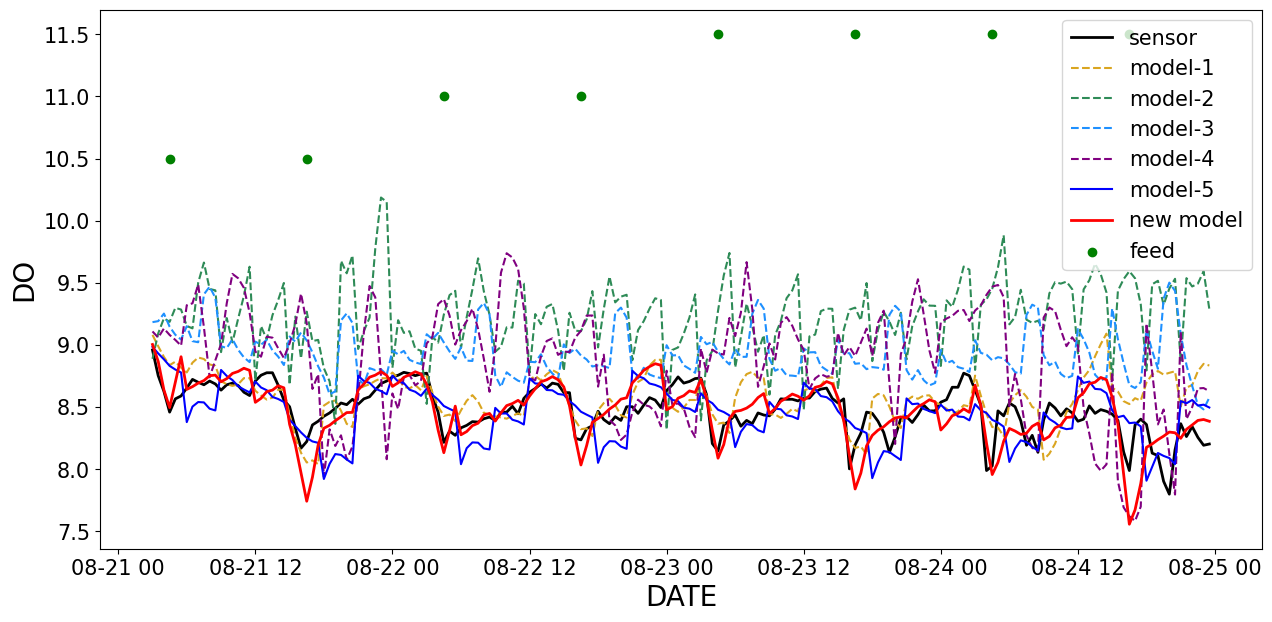

Euclidean Distance  3.361
Cosine Similarity  1.000
Mean Squared Error  0.061
Mean Absolute Error  0.184
Correlation Coefficient  0.327
Dynamic Time Warping Distance  26.491
Euclidean Distance  11.491
Cosine Similarity  0.999
Mean Squared Error  0.710
Mean Absolute Error  0.764
Correlation Coefficient  -0.157
Dynamic Time Warping Distance  129.578
Euclidean Distance  7.310
Cosine Similarity  0.999
Mean Squared Error  0.287
Mean Absolute Error  0.453
Correlation Coefficient  -0.078
Dynamic Time Warping Distance  73.492
Euclidean Distance  2.756
Cosine Similarity  1.000
Mean Squared Error  0.041
Mean Absolute Error  0.161
Correlation Coefficient  0.527
Dynamic Time Warping Distance  20.955
Euclidean Distance  8.108
Cosine Similarity  0.999
Mean Squared Error  0.353
Mean Absolute Error  0.499
Correlation Coefficient  0.172
Dynamic Time Warping Distance  66.766
Euclidean Distance  2.302
Cosine Similarity  1.000
Mean Squared Error  0.028
Mean Absolute Error  0.126
Correlation Coefficient  0.

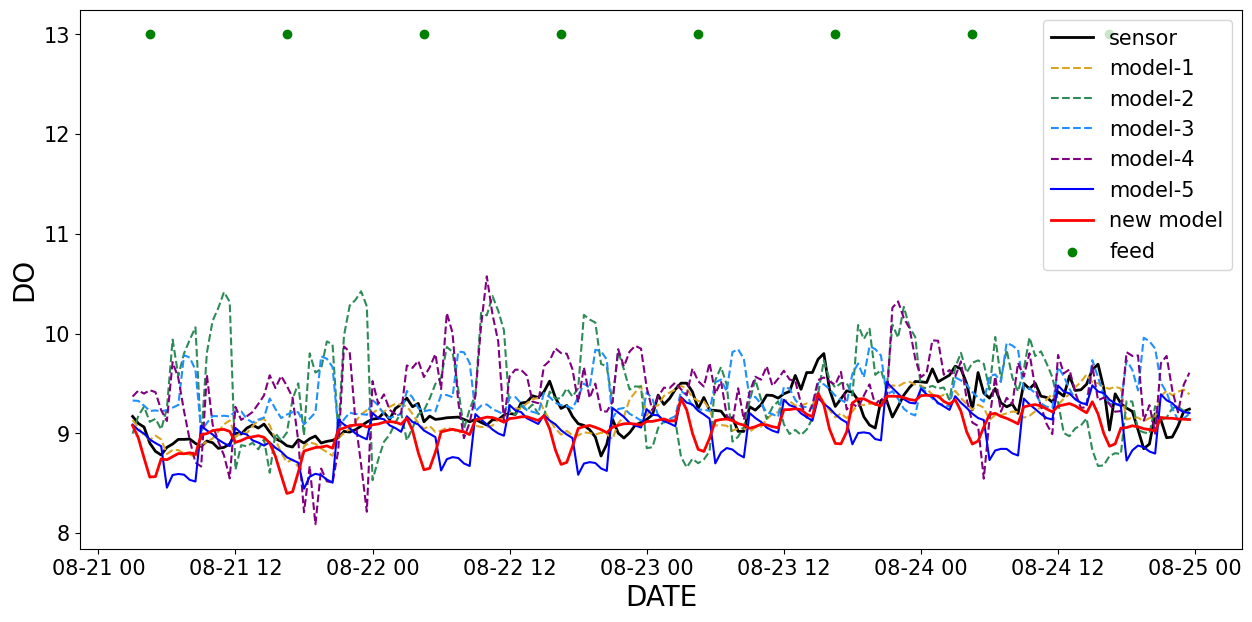

Euclidean Distance  2.305
Cosine Similarity  1.000
Mean Squared Error  0.029
Mean Absolute Error  0.133
Correlation Coefficient  0.698
Dynamic Time Warping Distance  16.697
Euclidean Distance  7.590
Cosine Similarity  0.998
Mean Squared Error  0.310
Mean Absolute Error  0.420
Correlation Coefficient  -0.145
Dynamic Time Warping Distance  50.684
Euclidean Distance  4.673
Cosine Similarity  0.999
Mean Squared Error  0.117
Mean Absolute Error  0.251
Correlation Coefficient  0.039
Dynamic Time Warping Distance  25.785
Euclidean Distance  3.549
Cosine Similarity  1.000
Mean Squared Error  0.068
Mean Absolute Error  0.216
Correlation Coefficient  0.649
Dynamic Time Warping Distance  29.180
Euclidean Distance  5.837
Cosine Similarity  0.999
Mean Squared Error  0.183
Mean Absolute Error  0.332
Correlation Coefficient  0.296
Dynamic Time Warping Distance  43.955
Euclidean Distance  3.260
Cosine Similarity  1.000
Mean Squared Error  0.057
Mean Absolute Error  0.191
Correlation Coefficient  0.601

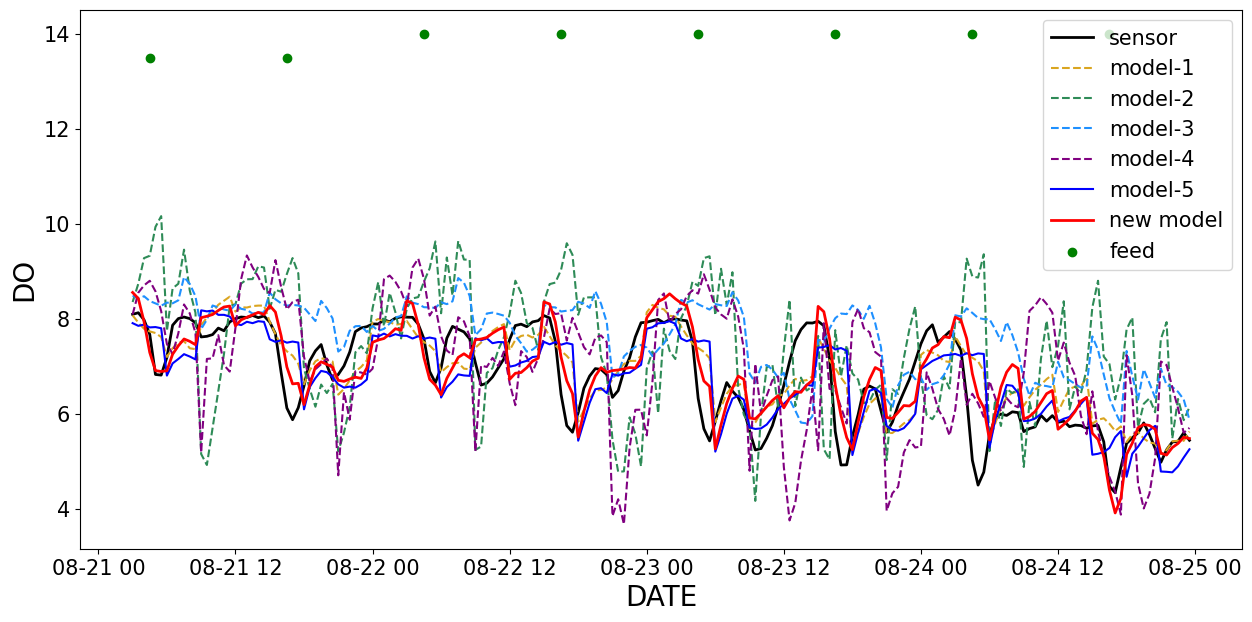

Euclidean Distance  9.120
Cosine Similarity  0.995
Mean Squared Error  0.447
Mean Absolute Error  0.493
Correlation Coefficient  0.768
Dynamic Time Warping Distance  58.781
Euclidean Distance  21.776
Cosine Similarity  0.979
Mean Squared Error  2.550
Mean Absolute Error  1.246
Correlation Coefficient  0.216
Dynamic Time Warping Distance  141.966
Euclidean Distance  17.759
Cosine Similarity  0.990
Mean Squared Error  1.696
Mean Absolute Error  1.052
Correlation Coefficient  0.389
Dynamic Time Warping Distance  98.509
Euclidean Distance  10.595
Cosine Similarity  0.994
Mean Squared Error  0.604
Mean Absolute Error  0.585
Correlation Coefficient  0.676
Dynamic Time Warping Distance  46.594
Euclidean Distance  18.805
Cosine Similarity  0.981
Mean Squared Error  1.901
Mean Absolute Error  1.120
Correlation Coefficient  0.355
Dynamic Time Warping Distance  101.839
Euclidean Distance  7.967
Cosine Similarity  0.996
Mean Squared Error  0.341
Mean Absolute Error  0.471
Correlation Coefficient  

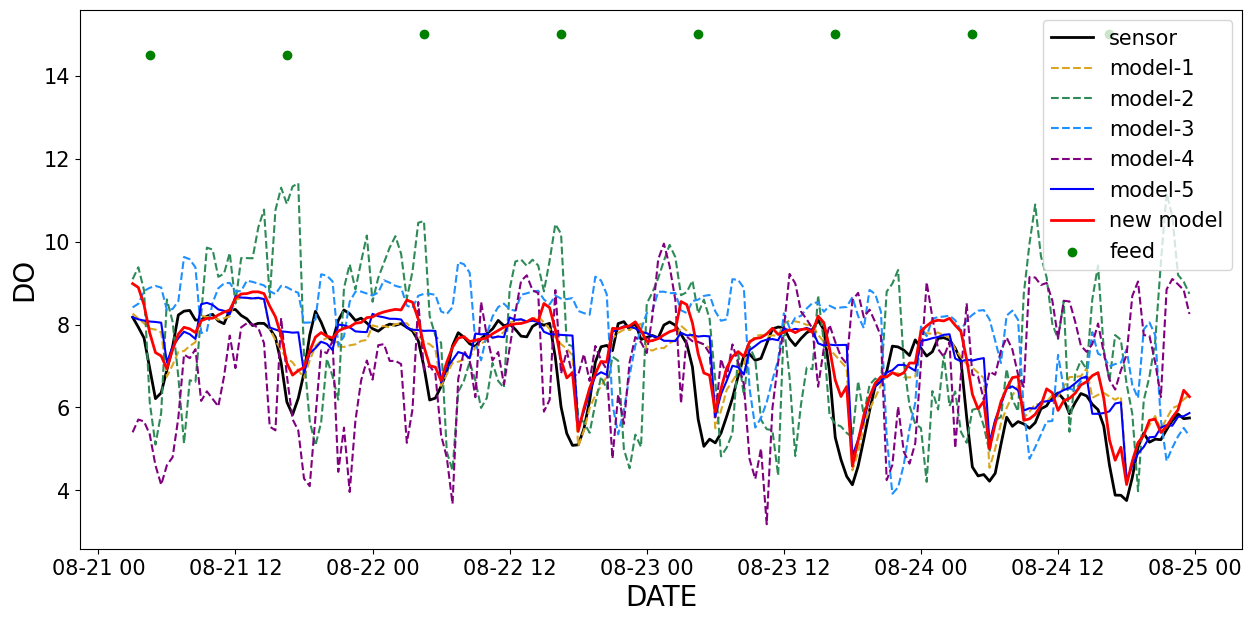

Euclidean Distance  10.737
Cosine Similarity  0.994
Mean Squared Error  0.620
Mean Absolute Error  0.529
Correlation Coefficient  0.796
Dynamic Time Warping Distance  44.551
Euclidean Distance  28.051
Cosine Similarity  0.967
Mean Squared Error  4.230
Mean Absolute Error  1.692
Correlation Coefficient  0.229
Dynamic Time Warping Distance  229.315
Euclidean Distance  24.594
Cosine Similarity  0.980
Mean Squared Error  3.252
Mean Absolute Error  1.452
Correlation Coefficient  0.265
Dynamic Time Warping Distance  121.123
Euclidean Distance  11.850
Cosine Similarity  0.994
Mean Squared Error  0.755
Mean Absolute Error  0.553
Correlation Coefficient  0.761
Dynamic Time Warping Distance  68.644
Euclidean Distance  26.730
Cosine Similarity  0.962
Mean Squared Error  3.841
Mean Absolute Error  1.649
Correlation Coefficient  -0.164
Dynamic Time Warping Distance  197.049
Euclidean Distance  8.862
Cosine Similarity  0.997
Mean Squared Error  0.422
Mean Absolute Error  0.487
Correlation Coefficien

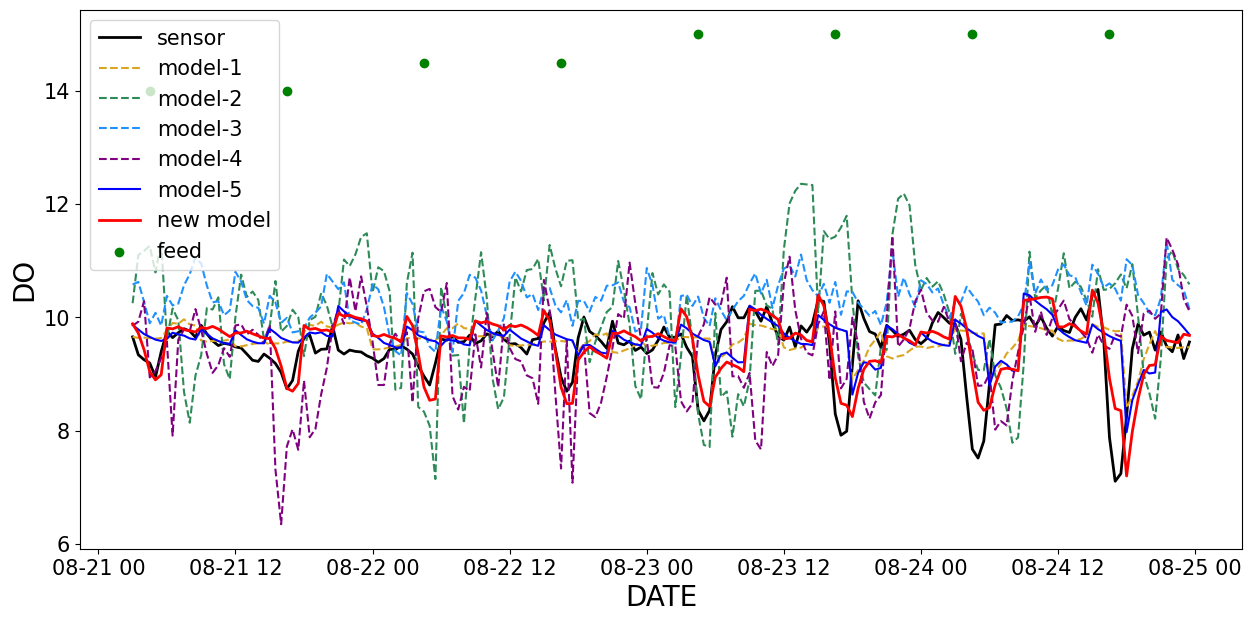

Euclidean Distance  8.251
Cosine Similarity  0.998
Mean Squared Error  0.366
Mean Absolute Error  0.390
Correlation Coefficient  -0.004
Dynamic Time Warping Distance  53.748
Euclidean Distance  18.089
Cosine Similarity  0.993
Mean Squared Error  1.759
Mean Absolute Error  1.090
Correlation Coefficient  -0.018
Dynamic Time Warping Distance  175.759
Euclidean Distance  14.044
Cosine Similarity  0.998
Mean Squared Error  1.060
Mean Absolute Error  0.833
Correlation Coefficient  0.140
Dynamic Time Warping Distance  113.163
Euclidean Distance  8.554
Cosine Similarity  0.998
Mean Squared Error  0.393
Mean Absolute Error  0.427
Correlation Coefficient  0.081
Dynamic Time Warping Distance  47.968
Euclidean Distance  13.170
Cosine Similarity  0.995
Mean Squared Error  0.932
Mean Absolute Error  0.761
Correlation Coefficient  0.071
Dynamic Time Warping Distance  93.239
Euclidean Distance  6.484
Cosine Similarity  0.999
Mean Squared Error  0.226
Mean Absolute Error  0.357
Correlation Coefficient 

In [3]:
for i in range(5):
    tank=i+1
    robust_name = 'model/Aqua_all_robust'
    standard_name = 'model/Aqua_all_standard'
    lstm_name = 'model/Aqua_all_lstm_nomal'
    minmax_name = 'model/Aqua_all_minmax'
    trend_name0 = 'model/Aqua_all_trend0'
    seasonal_name0 = 'model/Aqua_all_seasonal0'
    resid_name0 = 'model/Aqua_all_resid0'
    trend_name30 = 'model/Aqua_all_trend30'
    seasonal_name30 = 'model/Aqua_all_seasonal30'
    robust_model = load_model(robust_name+'_best.keras')
    standard_model = load_model(standard_name+'_best.keras')
    lstm_model = load_model(lstm_name+'_best.keras')
    minmax_model = load_model(minmax_name+'_best.keras')
    trend_model0 = load_model(trend_name0+'_best.keras')
    seasonal_model0 = load_model(seasonal_name0+'_best.keras')
    resid_model0 = load_model(resid_name0+'_best.keras')
    trend_model30 = load_model(trend_name30+'_best.keras')
    seasonal_model30 = load_model(seasonal_name30+'_best.keras')
    japonica_validation_food_supply_tb = pd.read_csv("dataset/japonica_validation_food_supply_tb.csv")
    japonica_validation_sensor_val_tb = pd.read_csv("dataset/japonica_validation_sensor_val_tb.csv")
    japonica_validation_food_supply_tb = japonica_validation_food_supply_tb[japonica_validation_food_supply_tb['tank_id']==tank]
    japonica_validation_food_supply_tb = japonica_validation_food_supply_tb[japonica_validation_food_supply_tb['feed_quantity'].notnull()]
    japonica_validation_food_supply_tb['feed_dt'] = pd.to_datetime(japonica_validation_food_supply_tb['feed_dt'], format='%Y%m%d%H%M', errors='raise')
    japonica_validation_food_supply_tb["feed_dt"] = japonica_validation_food_supply_tb["feed_dt"].apply(str)
    japonica_validation_food_supply_tb["feed_dt"] = japonica_validation_food_supply_tb["feed_dt"].str.slice(start=0, stop=16)
    japonica_validation_sensor_val_tb = japonica_validation_sensor_val_tb[japonica_validation_sensor_val_tb['tank_id']==tank]
    japonica_validation_sensor_val_tb["mea_dt"] = japonica_validation_sensor_val_tb["mea_dt"].apply(str)
    japonica_validation_sensor_val_tb["mea_dt"] = japonica_validation_sensor_val_tb["mea_dt"].str.slice(start=0, stop=16)
    japonica_validation_sensor_val_tb['mea_dt'] = pd.to_datetime(japonica_validation_sensor_val_tb['mea_dt'], format='%Y-%m-%d %H:%M', errors='raise')
    japonica_validation_sensor_val_tb['date'] = pd.to_datetime(japonica_validation_sensor_val_tb['mea_dt']).dt.date
    japonica_validation_food_supply_tb['date'] = pd.to_datetime(japonica_validation_food_supply_tb['feed_dt']).dt.date
    common_dates = japonica_validation_sensor_val_tb['date'].isin(japonica_validation_food_supply_tb['date'])
    japonica_validation_sensor_val_tb = japonica_validation_sensor_val_tb[common_dates]
    japonica_validation_sensor_val_tb = japonica_validation_sensor_val_tb.drop('date', axis=1)
    japonica_validation_sensor_val_tb.set_index('mea_dt', inplace=True)
    japonica_validation_sensor_val_tb = japonica_validation_sensor_val_tb.resample('30min').mean()
    japonica_validation_sensor_val_tb = japonica_validation_sensor_val_tb.reset_index()
    japonica_validation_sensor_val_tb = japonica_validation_sensor_val_tb.dropna()
    validation_counts = japonica_validation_sensor_val_tb.groupby(japonica_validation_sensor_val_tb['mea_dt'].dt.date).size()
    to_delete = validation_counts[validation_counts != 48].index
    japonica_validation_sensor_val_tb = japonica_validation_sensor_val_tb[~japonica_validation_sensor_val_tb['mea_dt'].dt.date.isin(to_delete)]
    japonica_validation_sensor_val_tb["mea_dt"] = japonica_validation_sensor_val_tb["mea_dt"].dt.strftime('%Y-%m-%d %H:%M')
    japonica_validation_sensor_val_tb["mea_dt"] = japonica_validation_sensor_val_tb["mea_dt"].str.slice(start=0, stop=16)
    japonica_validation_features = pd.merge(left = japonica_validation_sensor_val_tb, right = japonica_validation_food_supply_tb, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
    japonica_validation_features['mea_dt'] = pd.to_datetime(japonica_validation_features['mea_dt'], format='%Y-%m-%d %H:%M', errors='raise')
    feature_origin = ['tank_id','mea_dt', 'do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']
    japonica_validation_features = japonica_validation_features[feature_origin]
    japonica_validation_features = japonica_validation_features.fillna(0)
    japonica_validation_features.set_index('mea_dt', inplace=True)
    japonica_validation_data = japonica_validation_features.sort_index()
    japonica_validation_data = japonica_validation_data[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'feed_quantity', 'water_quantity']]
    japonica_validation_data = japonica_validation_data.loc['2021-07-22 00:00':'2021-09-09 23:59']
    robust_scaler = RobustScaler()
    test_standardized = robust_scaler.fit_transform(japonica_validation_data)
    japonica_robust_X = pd.DataFrame(test_standardized, columns=japonica_validation_data.columns, index=japonica_validation_data.index)
    minmax_scaler = MinMaxScaler()
    test_standardized = minmax_scaler.fit_transform(japonica_validation_data)
    japonica_minmax_X = pd.DataFrame(test_standardized, columns=japonica_validation_data.columns, index=japonica_validation_data.index)
    standard_scaler = StandardScaler()
    test_standardized = standard_scaler.fit_transform(japonica_validation_data)
    japonica_standard_X = pd.DataFrame(test_standardized, columns=japonica_validation_data.columns, index=japonica_validation_data.index)
    y_test = japonica_validation_data.loc['2021-08-21 03:00':'2021-08-24 23:59']
    X_test_trend = japonica_validation_data.loc['2021-08-21 00:00':'2021-08-24 20:59']
    X_test_seasonal = japonica_validation_data.loc['2021-08-21 03:00':'2021-08-24 23:59']
    X_test_minmax = japonica_minmax_X.loc['2021-08-21 00:00':'2021-08-24 20:59']
    X_test_standard = japonica_standard_X.loc['2021-08-21 00:00':'2021-08-24 20:59']
    X_test_robust = japonica_robust_X.loc['2021-08-21 00:00':'2021-08-24 20:59']
    X_test_lstm = japonica_validation_data.loc['2021-08-21 00:00':'2021-08-24 20:59']
    grapeNEva(y_test, standard_model, lstm_model, minmax_model, robust_model, trend_model30, seasonal_model30, trend_model0, seasonal_model0, resid_model0, standard_scaler, minmax_scaler, robust_scaler, X_test_trend, X_test_seasonal, X_test_standard, X_test_lstm, X_test_minmax, X_test_robust)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


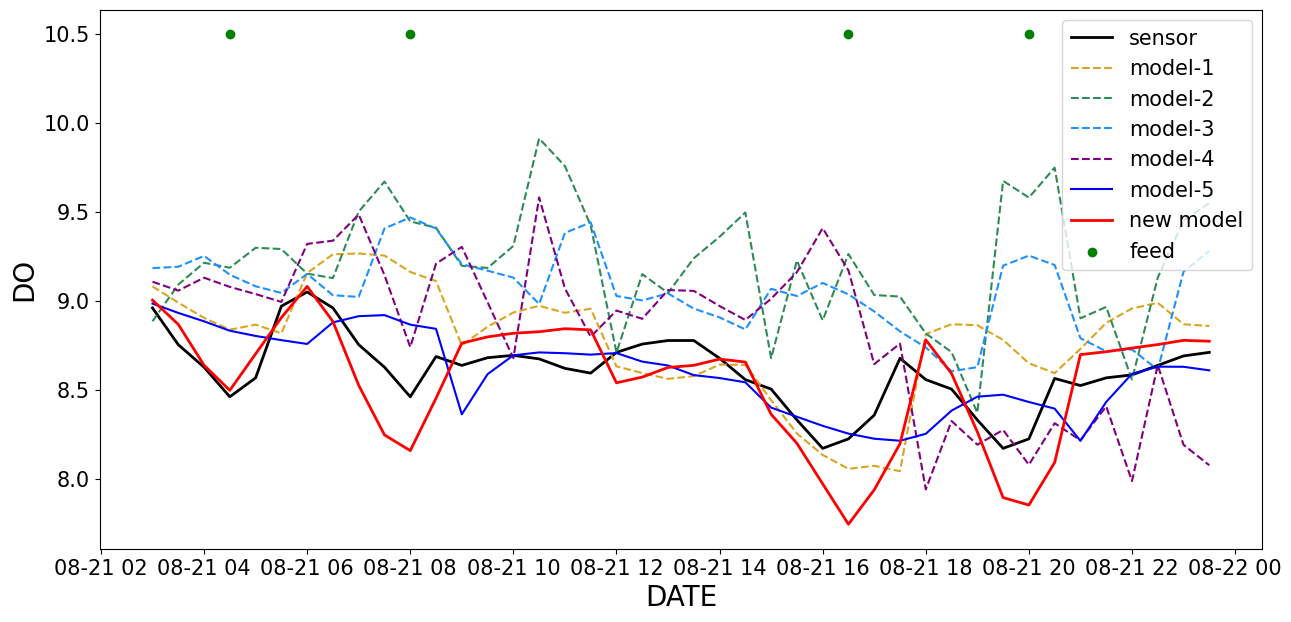

Euclidean Distance  2.098
Cosine Similarity  1.000
Mean Squared Error  0.105
Mean Absolute Error  0.273
Correlation Coefficient  0.505
Dynamic Time Warping Distance  7.504
Euclidean Distance  4.643
Cosine Similarity  0.999
Mean Squared Error  0.513
Mean Absolute Error  0.607
Correlation Coefficient  0.030
Dynamic Time Warping Distance  19.366
Euclidean Distance  3.489
Cosine Similarity  0.999
Mean Squared Error  0.290
Mean Absolute Error  0.455
Correlation Coefficient  0.076
Dynamic Time Warping Distance  11.846
Euclidean Distance  1.258
Cosine Similarity  1.000
Mean Squared Error  0.038
Mean Absolute Error  0.156
Correlation Coefficient  0.588
Dynamic Time Warping Distance  3.451
Euclidean Distance  3.085
Cosine Similarity  0.999
Mean Squared Error  0.227
Mean Absolute Error  0.391
Correlation Coefficient  0.318
Dynamic Time Warping Distance  11.573
Euclidean Distance  1.414
Cosine Similarity  1.000
Mean Squared Error  0.048
Mean Absolute Error  0.178
Correlation Coefficient  0.804
Dy

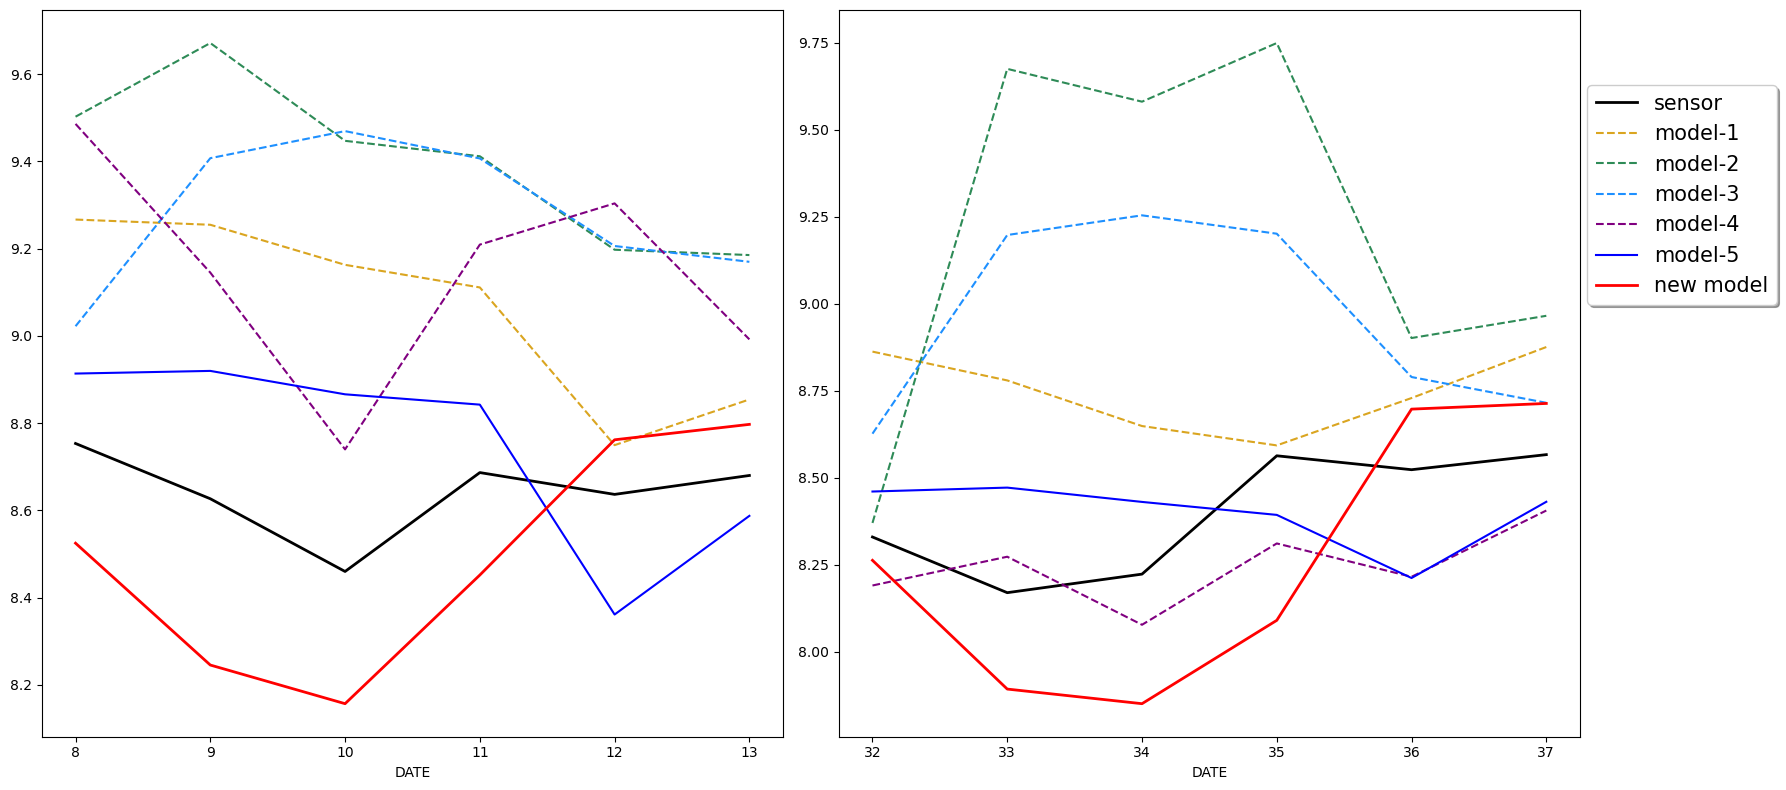

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


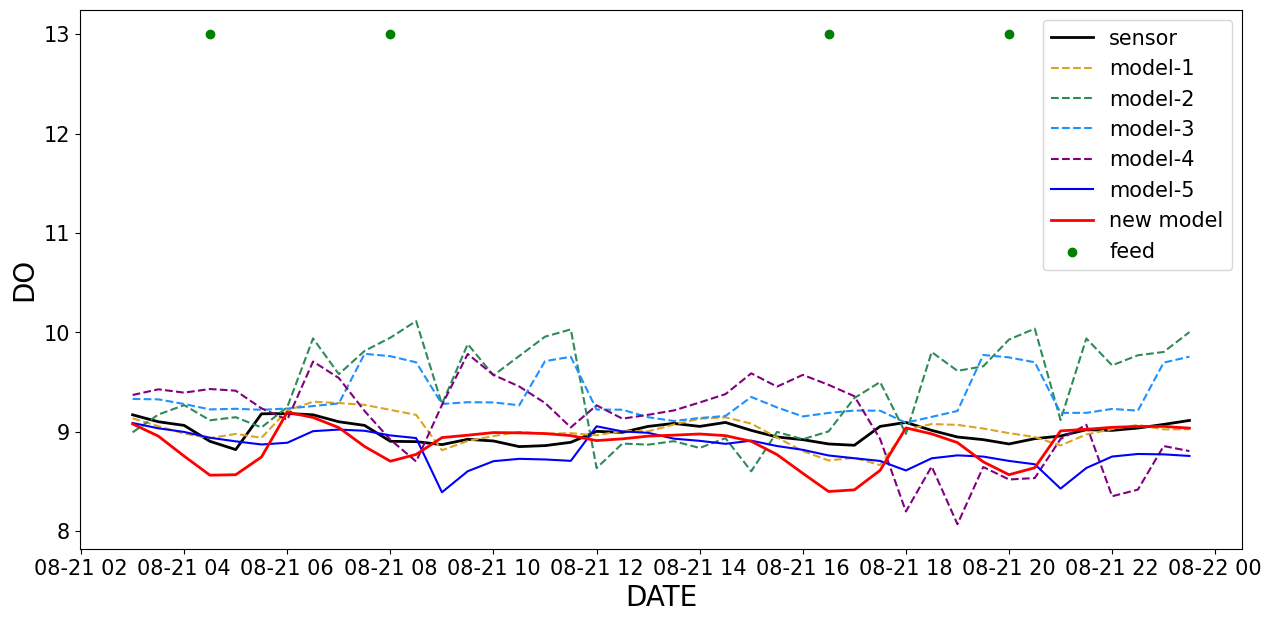

Euclidean Distance  0.844
Cosine Similarity  1.000
Mean Squared Error  0.017
Mean Absolute Error  0.099
Correlation Coefficient  0.473
Dynamic Time Warping Distance  2.510
Euclidean Distance  4.129
Cosine Similarity  0.999
Mean Squared Error  0.406
Mean Absolute Error  0.521
Correlation Coefficient  -0.218
Dynamic Time Warping Distance  17.421
Euclidean Distance  2.858
Cosine Similarity  1.000
Mean Squared Error  0.194
Mean Absolute Error  0.350
Correlation Coefficient  -0.230
Dynamic Time Warping Distance  13.511
Euclidean Distance  1.492
Cosine Similarity  1.000
Mean Squared Error  0.053
Mean Absolute Error  0.189
Correlation Coefficient  0.427
Dynamic Time Warping Distance  6.936
Euclidean Distance  2.874
Cosine Similarity  0.999
Mean Squared Error  0.197
Mean Absolute Error  0.374
Correlation Coefficient  0.001
Dynamic Time Warping Distance  13.549
Euclidean Distance  1.321
Cosine Similarity  1.000
Mean Squared Error  0.042
Mean Absolute Error  0.155
Correlation Coefficient  0.559


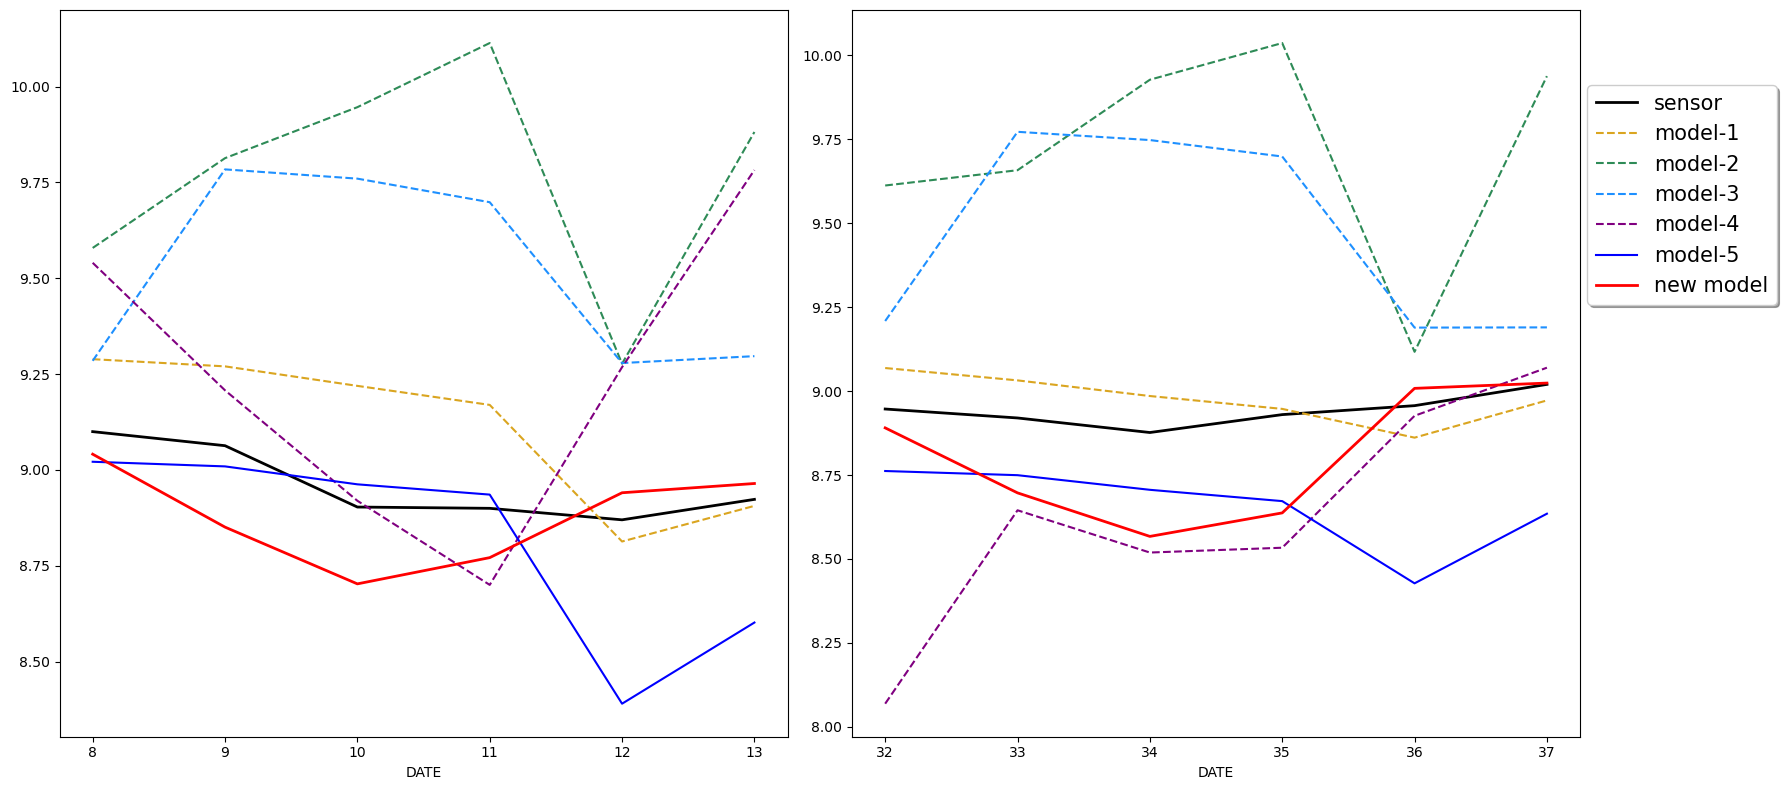

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


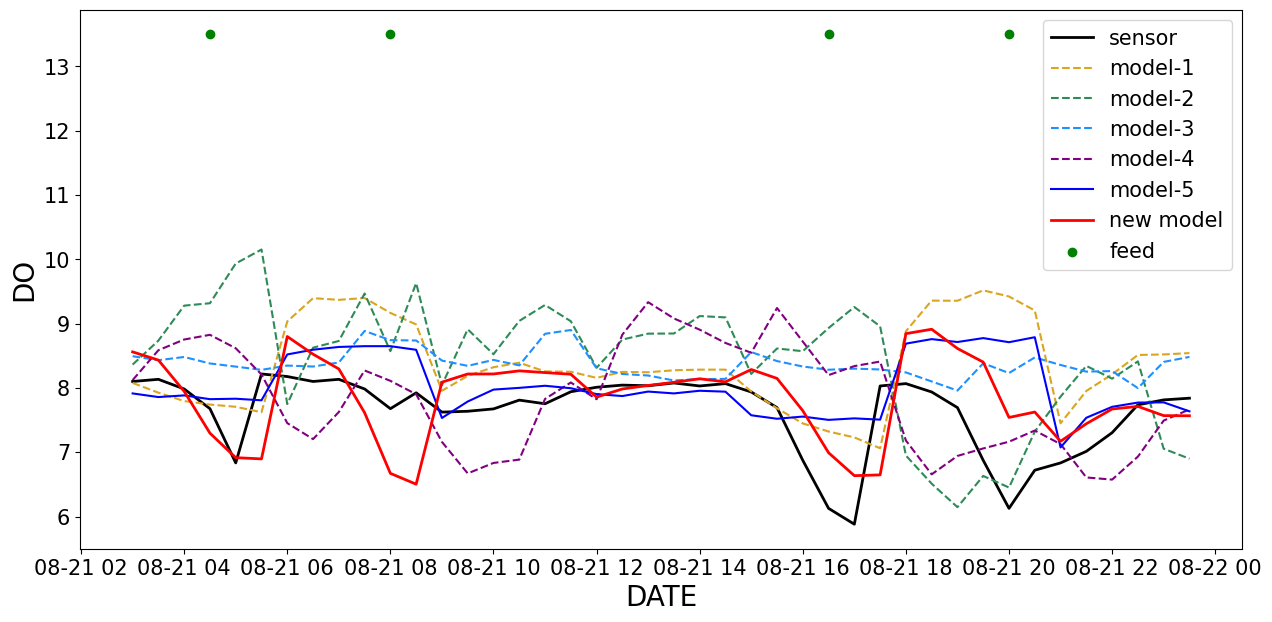

Euclidean Distance  7.066
Cosine Similarity  0.995
Mean Squared Error  1.189
Mean Absolute Error  0.822
Correlation Coefficient  0.186
Dynamic Time Warping Distance  29.535
Euclidean Distance  8.496
Cosine Similarity  0.992
Mean Squared Error  1.718
Mean Absolute Error  1.105
Correlation Coefficient  0.171
Dynamic Time Warping Distance  36.494
Euclidean Distance  6.276
Cosine Similarity  0.997
Mean Squared Error  0.938
Mean Absolute Error  0.748
Correlation Coefficient  0.096
Dynamic Time Warping Distance  28.765
Euclidean Distance  5.177
Cosine Similarity  0.996
Mean Squared Error  0.638
Mean Absolute Error  0.542
Correlation Coefficient  0.152
Dynamic Time Warping Distance  20.040
Euclidean Distance  6.092
Cosine Similarity  0.993
Mean Squared Error  0.884
Mean Absolute Error  0.754
Correlation Coefficient  0.179
Dynamic Time Warping Distance  22.053
Euclidean Distance  4.431
Cosine Similarity  0.997
Mean Squared Error  0.468
Mean Absolute Error  0.536
Correlation Coefficient  0.446


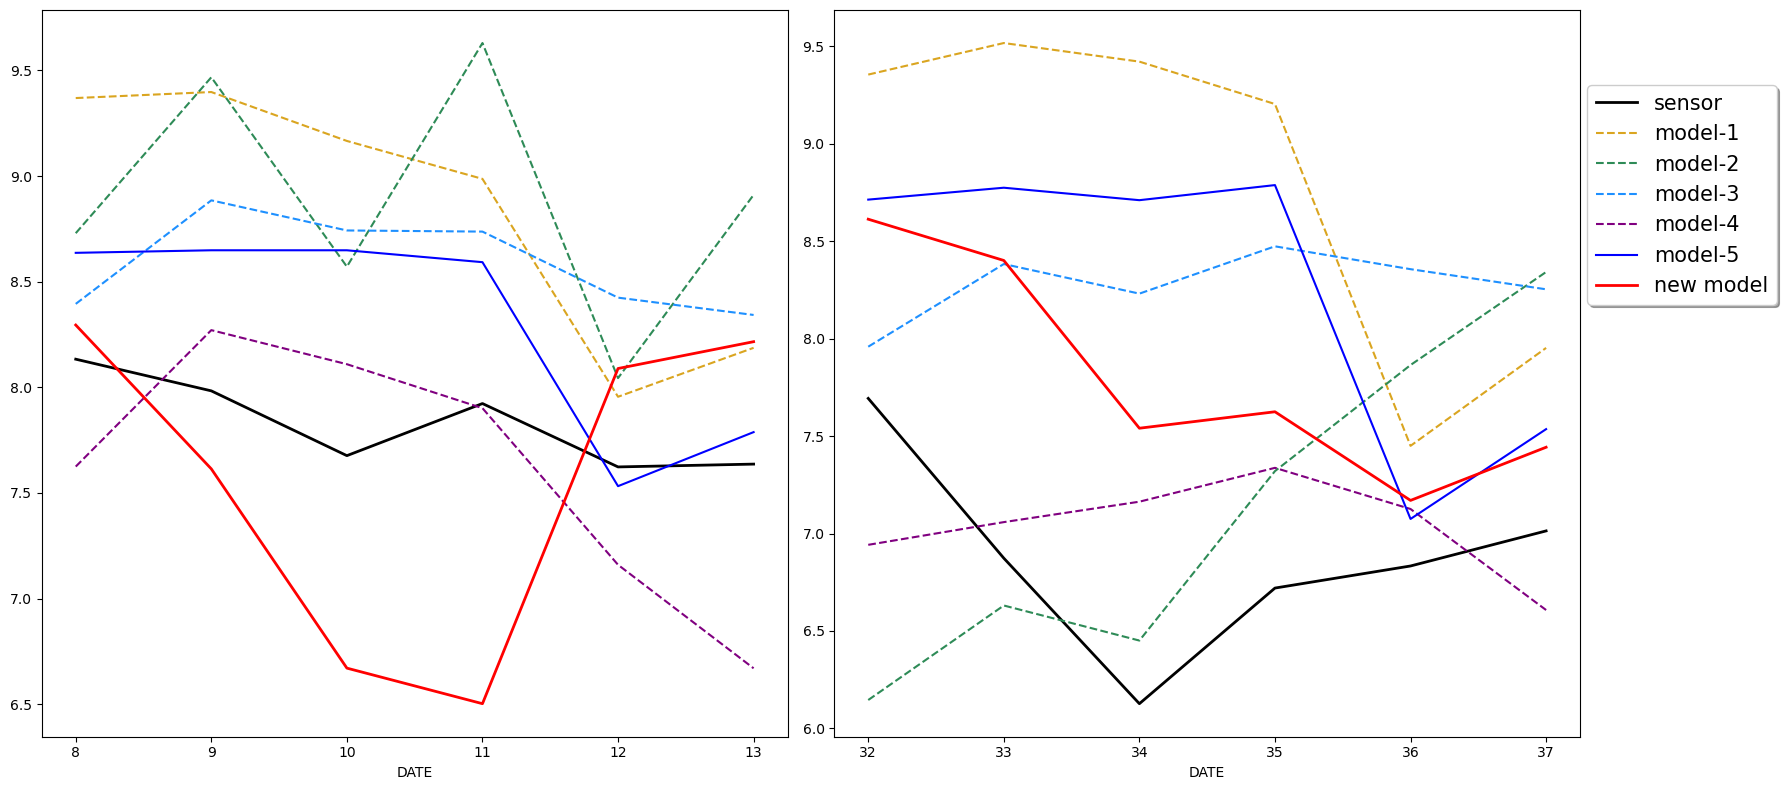

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


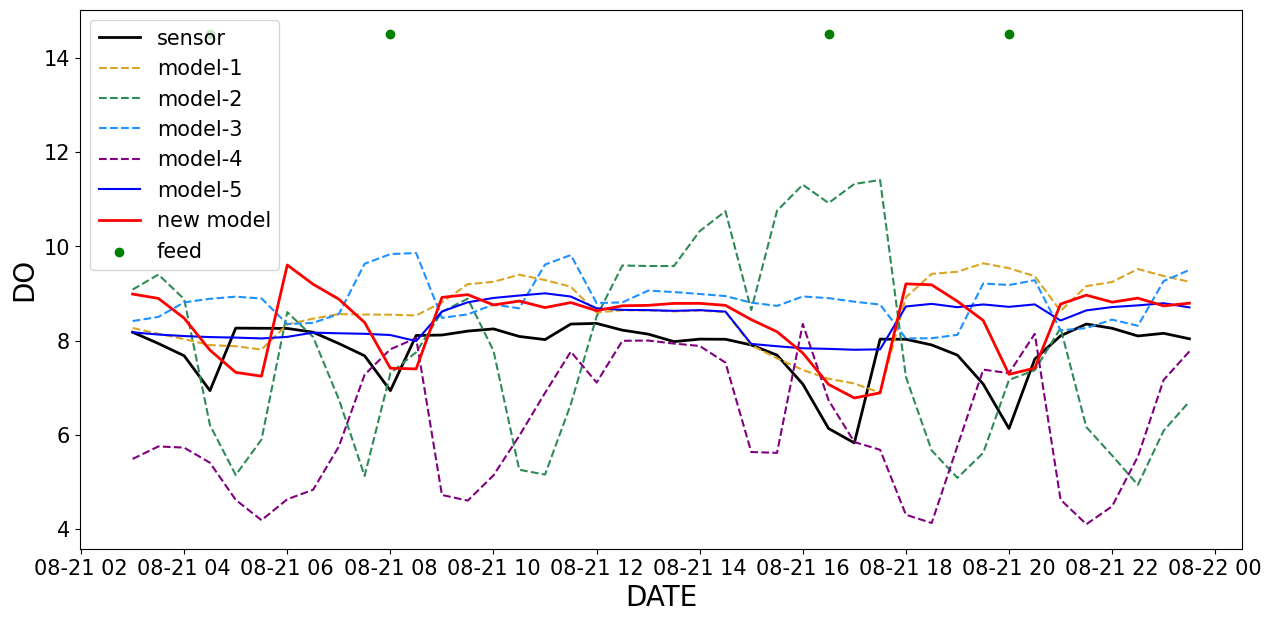

Euclidean Distance  7.201
Cosine Similarity  0.996
Mean Squared Error  1.235
Mean Absolute Error  0.887
Correlation Coefficient  0.312
Dynamic Time Warping Distance  32.106
Euclidean Distance  14.279
Cosine Similarity  0.962
Mean Squared Error  4.855
Mean Absolute Error  1.785
Correlation Coefficient  -0.236
Dynamic Time Warping Distance  61.451
Euclidean Distance  8.639
Cosine Similarity  0.995
Mean Squared Error  1.777
Mean Absolute Error  1.033
Correlation Coefficient  -0.207
Dynamic Time Warping Distance  39.175
Euclidean Distance  5.508
Cosine Similarity  0.997
Mean Squared Error  0.722
Mean Absolute Error  0.656
Correlation Coefficient  0.363
Dynamic Time Warping Distance  22.774
Euclidean Distance  14.924
Cosine Similarity  0.969
Mean Squared Error  5.303
Mean Absolute Error  1.860
Correlation Coefficient  -0.248
Dynamic Time Warping Distance  50.668
Euclidean Distance  5.409
Cosine Similarity  0.998
Mean Squared Error  0.697
Mean Absolute Error  0.791
Correlation Coefficient  0

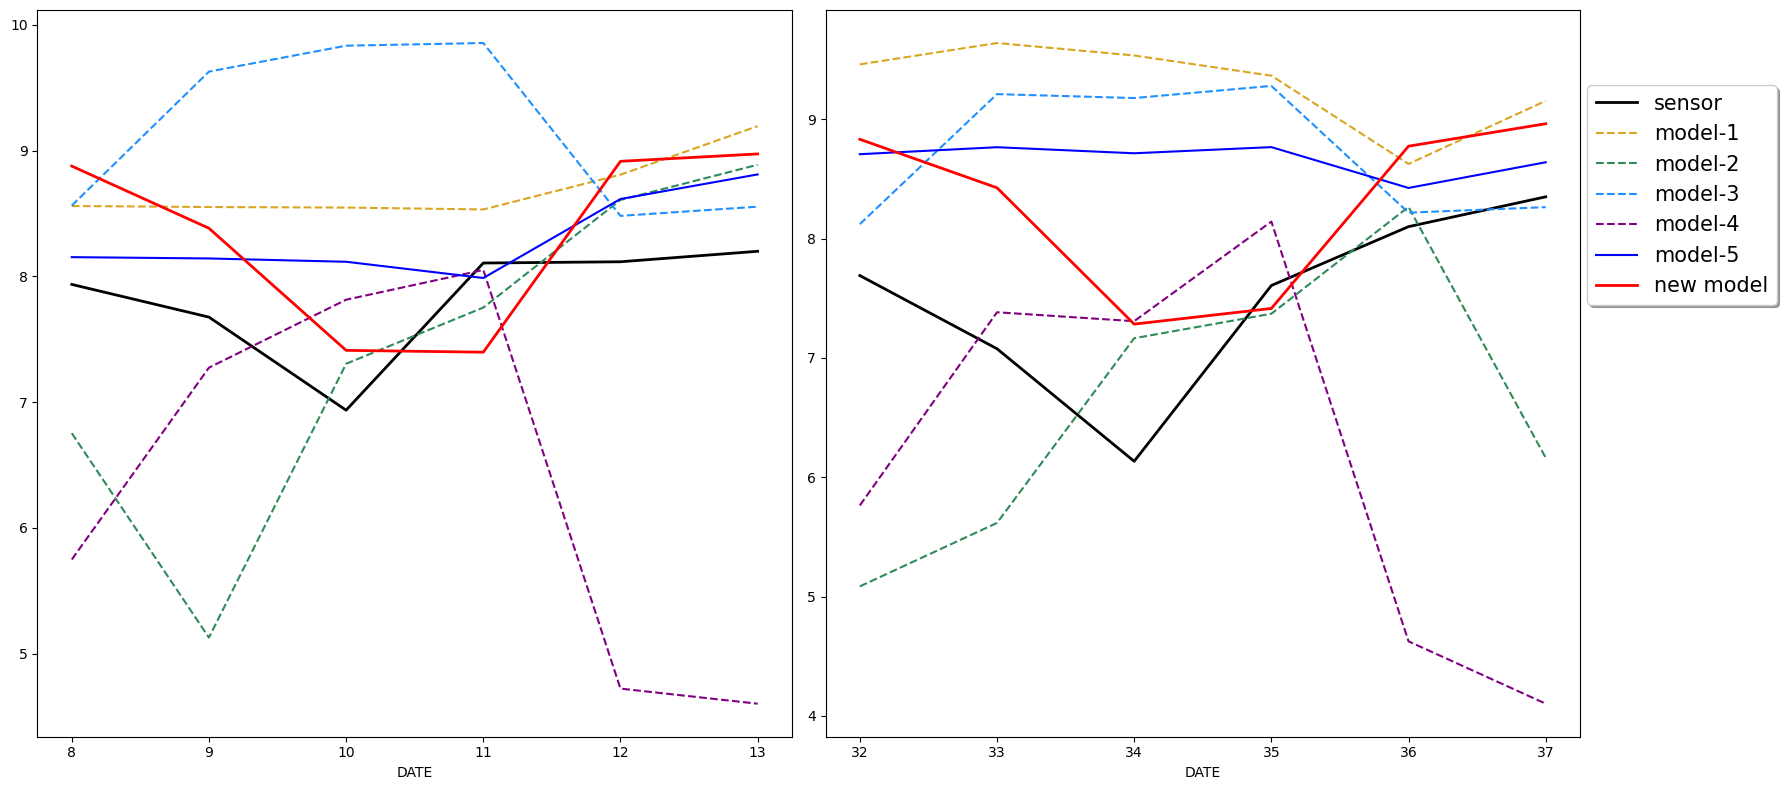

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


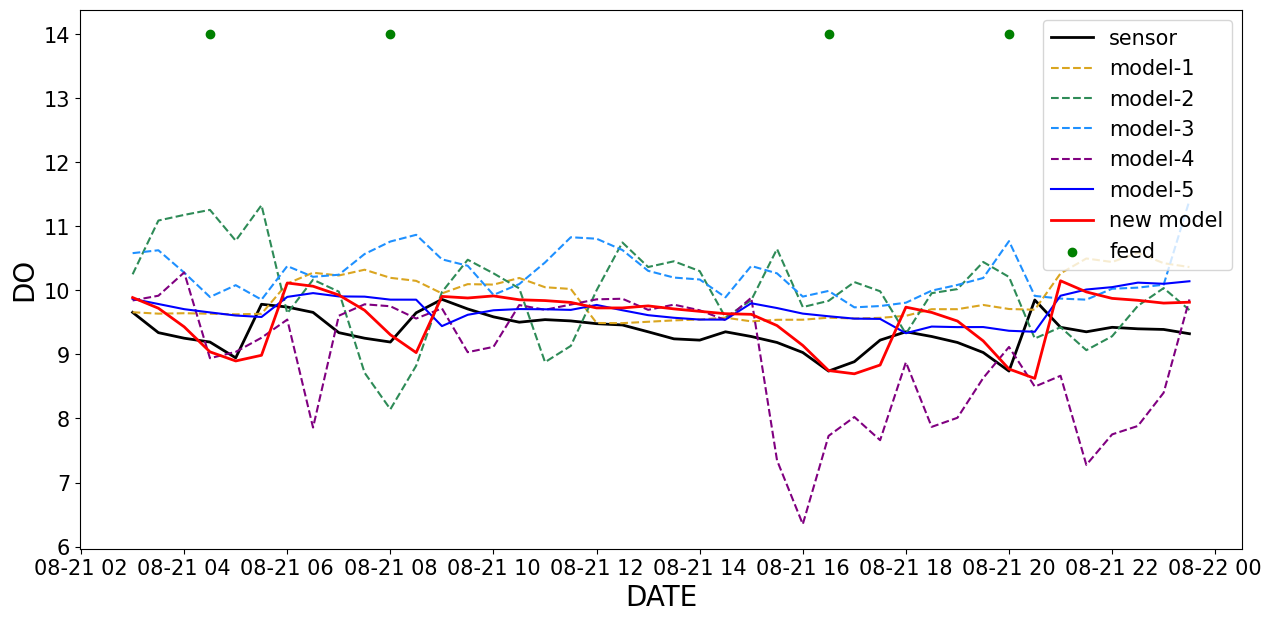

Euclidean Distance  4.081
Cosine Similarity  0.999
Mean Squared Error  0.396
Mean Absolute Error  0.533
Correlation Coefficient  0.321
Dynamic Time Warping Distance  19.766
Euclidean Distance  6.340
Cosine Similarity  0.997
Mean Squared Error  0.957
Mean Absolute Error  0.822
Correlation Coefficient  -0.111
Dynamic Time Warping Distance  24.845
Euclidean Distance  6.425
Cosine Similarity  0.999
Mean Squared Error  0.983
Mean Absolute Error  0.897
Correlation Coefficient  0.131
Dynamic Time Warping Distance  35.686
Euclidean Distance  3.017
Cosine Similarity  0.999
Mean Squared Error  0.217
Mean Absolute Error  0.411
Correlation Coefficient  0.203
Dynamic Time Warping Distance  11.900
Euclidean Distance  6.298
Cosine Similarity  0.995
Mean Squared Error  0.944
Mean Absolute Error  0.754
Correlation Coefficient  0.304
Dynamic Time Warping Distance  23.826
Euclidean Distance  2.723
Cosine Similarity  0.999
Mean Squared Error  0.177
Mean Absolute Error  0.355
Correlation Coefficient  0.492

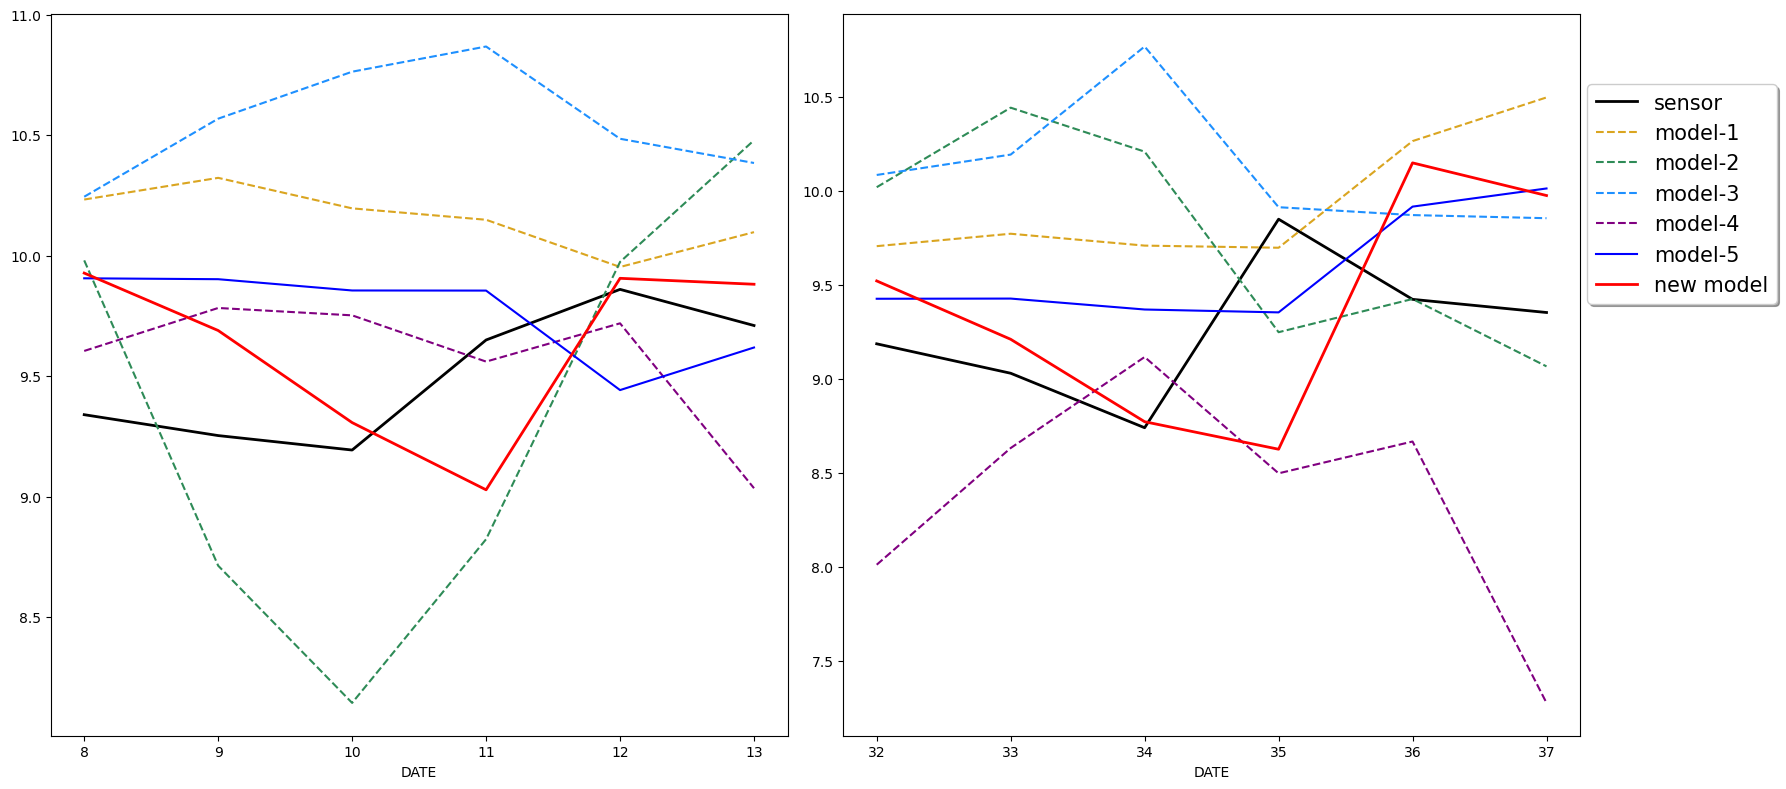

In [4]:
for i in range(5):
    tank=i+1
    robust_name = 'model/Aqua_all_robust'
    standard_name = 'model/Aqua_all_standard'
    lstm_name = 'model/Aqua_all_lstm_nomal'
    minmax_name = 'model/Aqua_all_minmax'
    trend_name0 = 'model/Aqua_all_trend0'
    seasonal_name0 = 'model/Aqua_all_seasonal0'
    resid_name0 = 'model/Aqua_all_resid0'
    trend_name30 = 'model/Aqua_all_trend30'
    seasonal_name30 = 'model/Aqua_all_seasonal30'
    robust_model = load_model(robust_name+'_best.keras')
    standard_model = load_model(standard_name+'_best.keras')
    lstm_model = load_model(lstm_name+'_best.keras')
    minmax_model = load_model(minmax_name+'_best.keras')
    trend_model0 = load_model(trend_name0+'_best.keras')
    seasonal_model0 = load_model(seasonal_name0+'_best.keras')
    resid_model0 = load_model(resid_name0+'_best.keras')
    trend_model30 = load_model(trend_name30+'_best.keras')
    seasonal_model30 = load_model(seasonal_name30+'_best.keras')
    japonica_validation_data = pd.read_csv('dataset/japonica_validation_data_v2_'+str(i)+'.csv')
    japonica_validation_data['mea_dt'] = pd.to_datetime(japonica_validation_data['mea_dt'], format='%Y-%m-%d %H:%M', errors='raise')
    japonica_validation_data.set_index('mea_dt', inplace=True)
    robust_scaler = RobustScaler()
    test_standardized = robust_scaler.fit_transform(japonica_validation_data)
    japonica_robust_X = pd.DataFrame(test_standardized, columns=japonica_validation_data.columns, index=japonica_validation_data.index)
    minmax_scaler = MinMaxScaler()
    test_standardized = minmax_scaler.fit_transform(japonica_validation_data)
    japonica_minmax_X = pd.DataFrame(test_standardized, columns=japonica_validation_data.columns, index=japonica_validation_data.index)
    standard_scaler = StandardScaler()
    test_standardized = standard_scaler.fit_transform(japonica_validation_data)
    japonica_standard_X = pd.DataFrame(test_standardized, columns=japonica_validation_data.columns, index=japonica_validation_data.index)
    y_test = japonica_validation_data.loc['2021-08-21 03:00':'2021-08-21 23:59']
    X_test_trend = japonica_validation_data.loc['2021-08-21 00:00':'2021-08-21 20:59']
    X_test_seasonal = japonica_validation_data.loc['2021-08-21 03:00':'2021-08-21 23:59']
    X_test_minmax = japonica_minmax_X.loc['2021-08-21 00:00':'2021-08-21 20:59']
    X_test_robust = japonica_robust_X.loc['2021-08-21 00:00':'2021-08-21 20:59']
    X_test_standard = japonica_standard_X.loc['2021-08-21 00:00':'2021-08-21 20:59']
    X_test_lstm = japonica_validation_data.loc['2021-08-21 00:00':'2021-08-21 20:59']
    grapeNEva(y_test, standard_model, lstm_model, minmax_model, robust_model, trend_model30, seasonal_model30, trend_model0, seasonal_model0, resid_model0, standard_scaler, minmax_scaler, robust_scaler, X_test_trend, X_test_seasonal, X_test_standard, X_test_lstm, X_test_minmax, X_test_robust)
    grapeNEva3(y_test, standard_model, lstm_model, minmax_model, robust_model, trend_model30, seasonal_model30, trend_model0, seasonal_model0, resid_model0, standard_scaler, minmax_scaler, robust_scaler, X_test_trend, X_test_seasonal, X_test_standard, X_test_lstm, X_test_minmax, X_test_robust)